AVISO Altimetry Data from 1993-2015 15N-15S

In [14]:
import warnings

import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

In [15]:
file = "/project/airsea/AVISO/1993_2015_15N-15S_AVISO_SLA_ADT.nc"
ds = xr.open_dataset(file)
ds

<xarray.Dataset>
Dimensions:    (latitude: 121, longitude: 1440, time: 8400)
Coordinates:
  * longitude  (longitude) float32 0.125 0.375 0.625 ... 359.375 359.625 359.875
  * latitude   (latitude) float32 -14.875 -14.625 -14.375 ... 14.875 15.125
  * time       (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2015-12-31
Data variables:
    sla        (time, latitude, longitude) float64 ...
    adt        (time, latitude, longitude) float64 ...
Attributes:
    CDI:                             Climate Data Interface version 1.8.2 (ht...
    Conventions:                     CF-1.6
    history:                         Mon Aug 28 00:35:48 2017: cdo mergetime ...
    source:                          Altimetry measurements
    institution:                     CLS, CNES
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         

Plotting Data

In [16]:
ds_mean=ds.sla[0:365,:,:].mean(dim="time")
ds_mean

/opt/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.DataArray 'sla' (latitude: 121, longitude: 1440)>
array([[0.01019781, 0.00790959, 0.00568192, ..., 0.01473178, 0.01377425,
        0.01223753],
       [0.00947644, 0.00782877, 0.00625315, ..., 0.01288356, 0.01211616,
        0.01095918],
       [0.00873808, 0.00800849, 0.00737644, ..., 0.01050822, 0.01003589,
        0.00941753],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])
Coordinates:
  * longitude  (longitude) float32 0.125 0.375 0.625 ... 359.375 359.625 359.875
  * latitude   (latitude) float32 -14.875 -14.625 -14.375 ... 14.875 15.125

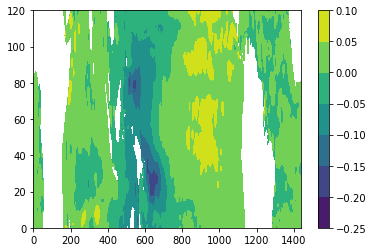

In [17]:
plt.contourf(ds_mean)
plt.colorbar()